In [1]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle

In [2]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
df = df[['tipodepropiedad','fecha','lat','lng','banos','antiguedad','metrostotales','precio']]

In [4]:
def precio_por_metros_totales(precio, metros):
        return precio/metros

df['precioXmetro'] = df.apply(lambda x: precio_por_metros_totales(x['precio'], x['metrostotales']), axis=1)

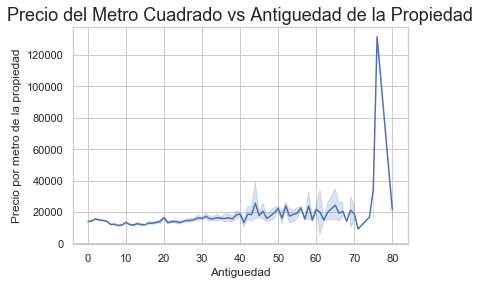

In [5]:
g = sns.lineplot(x=df.antiguedad, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Antiguedad de la Propiedad", fontsize=18)
g.set_xlabel("Antiguedad", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

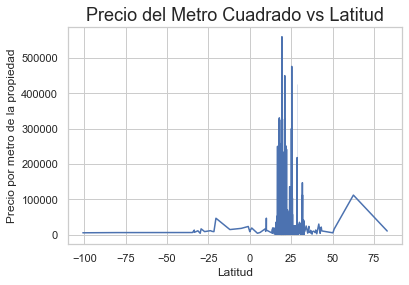

In [6]:
g = sns.lineplot(x=df.lat, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Latitud", fontsize=18)
g.set_xlabel("Latitud", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

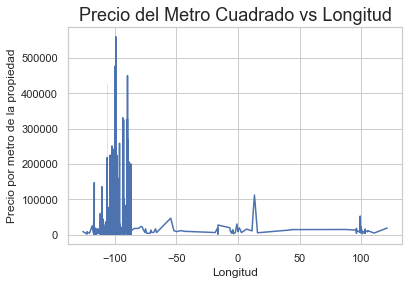

In [7]:
g = sns.lineplot(x=df.lng, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Longitud", fontsize=18)
g.set_xlabel("Longitud", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

In [8]:
df['banos']

id
254099    2.0
53461     2.0
247984    2.0
209067    1.0
185997    1.0
         ... 
119879    1.0
259178    3.0
131932    2.0
146867    4.0
121958    2.0
Name: banos, Length: 240000, dtype: float64

In [9]:
porbano = df.groupby('banos').agg({'precioXmetro': 'mean'})
porbano

,precioXmetro
banos,
1.0,10399.823672
2.0,14720.506293
3.0,16390.989688
4.0,17349.657940


In [28]:
df['anio'] = pd.DatetimeIndex(df['fecha']).year
unb = df[(df['banos'] == 1) & (df['tipodepropiedad'] == 'Casa')]
dosb = df[(df['banos'] == 2) & (df['tipodepropiedad'] == 'Casa')]
tresb = df[(df['banos'] == 3) & (df['tipodepropiedad'] == 'Casa')]
cuatrob = df[(df['banos'] == 4) & (df['tipodepropiedad'] == 'Casa')]
unb = unb.groupby('anio').agg({'precioXmetro': 'mean'})
dosb = dosb.groupby('anio').agg({'precioXmetro': 'mean'})
tresb = tresb.groupby('anio').agg({'precioXmetro': 'mean'})
cuatrob = cuatrob.groupby('anio').agg({'precioXmetro': 'mean'})

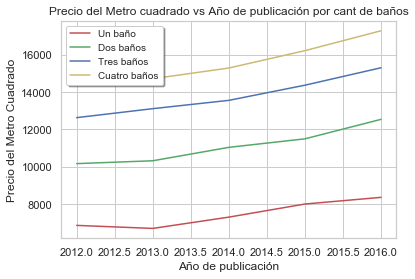

In [100]:
fig, ax = plt.subplots()

ax.plot(unb.index, unb.precioXmetro, 'r', label='Un baño')
ax.plot(dosb.index, dosb.precioXmetro, 'g', label="Dos baños")
ax.plot(tresb.index, tresb.precioXmetro, 'b',label="Tres baños")
ax.plot(cuatrob.index, cuatrob.precioXmetro, 'y', label="Cuatro baños")
legend = ax.legend(loc='upper left', shadow=True, fontsize='medium')
ag.legend(['Un baño', 'Dos baños', 'Tres baños', 'Cuatro baños'])
plt.xlabel('Año de publicación')
plt.ylabel('Precio del Metro Cuadrado')
plt.title('Precio del Metro cuadrado vs Año de publicación por cant de baños')
plt.show()

#El comportamiento del precio del metro cuadrado promedio por anio es similar para distintas cantidades, 
#pero es mayor mientras mas banos se tenga


In [79]:
df0a5 = df[(df.antiguedad>=0) & (df.antiguedad<= 5)]
df5a10 = df[(df.antiguedad>5) & (df.antiguedad<= 10)]
df10a20 = df[(df.antiguedad>10) & (df.antiguedad<= 20)]
df20a30 = df[(df.antiguedad>20) & (df.antiguedad<= 30)]
df30a40 = df[(df.antiguedad>30) & (df.antiguedad<= 40)]
df40a50 = df[(df.antiguedad>40) & (df.antiguedad<= 50)]
df50a60 = df[(df.antiguedad>50) & (df.antiguedad<= 60)]
df60a70 = df[(df.antiguedad>60) & (df.antiguedad<= 70)]
df70a80 = df[(df.antiguedad>70) & (df.antiguedad<= 80)]


print("0 a 5",df0a5.shape)
print("5 a 10",df5a10.shape)
print("10 a 20", df10a20.shape)
print("20 a 30",df20a30.shape)
print("30 a 40", df30a40.shape)
print("40 a 50",df40a50.shape)
print("50 a 60", df50a60.shape)
print("60 a 70",df60a70.shape)
print("70 a 80", df70a80.shape)

0 a 5 (114575, 10)
5 a 10 (37542, 10)
10 a 20 (30436, 10)
20 a 30 (8397, 10)
30 a 40 (3256, 10)
40 a 50 (1818, 10)
50 a 60 (308, 10)
60 a 70 (72, 10)
70 a 80 (41, 10)


In [111]:
def grupo_por_antiguedad(antiguedad):
    if antiguedad >= 0 and antiguedad <= 5:
        return "0-5"
    elif antiguedad > 5 and antiguedad <= 10:
        return "05-10"
    elif antiguedad > 10 and antiguedad <= 20:
        return "10-20"
    elif antiguedad > 20 and antiguedad <= 30:
        return "20-30"
    elif antiguedad > 30 and antiguedad <= 40:
        return "30-40"
    elif antiguedad > 40 and antiguedad <= 50:
        return "40-50"
    elif antiguedad > 50 and antiguedad <= 60:
        return "50-60"
    elif antiguedad > 60 and antiguedad <= 70:
        return "60-70"
    elif antiguedad > 70 and antiguedad <= 80:
        return "70-80"

df['grupoXantiguedad'] = df.apply(lambda x: grupo_por_antiguedad(x['antiguedad']), axis=1)

In [112]:
precioMetroXantiguedad = df.groupby('grupoXantiguedad').agg({'precioXmetro':'mean'})

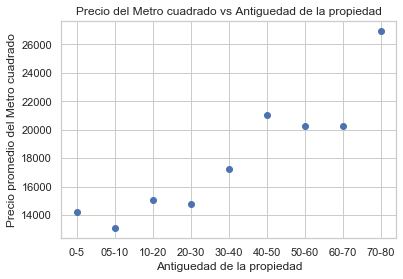

In [113]:
plt.plot(precioMetroXantiguedad.index, precioMetroXantiguedad.precioXmetro, 'o')
plt.title('Precio del Metro cuadrado vs Antiguedad de la propiedad')
plt.xlabel('Antiguedad de la propiedad')
plt.ylabel('Precio promedio del Metro cuadrado')
plt.show()

,tipodepropiedad,precioXmetro
id,,
12830,Casa,2972.972973
172408,Casa,5044.642857
91694,Casa,5281.690141
90417,Casa,5337.078652
184411,Casa,6750.000000
142971,Casa,7303.370787
126859,Casa,9200.000000
270331,Casa,10078.740157
196433,Casa,10588.235294
